In [1]:
import numpy as np
import pandas as pd
import statistics
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv("titanic.csv")
data.head()

,Survived,Passanger Class,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare in British Pounds
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [3]:
# Question 1, What was the average cost in U.S. dollars of a first-class ticket?

first_prices = data.loc[data['Passanger Class'] == 1]["Fare in British Pounds"]
average_price = sum(first_prices) / len(first_prices)

print('The average price of a first class passenger ticket is:', round(average_price, 2), 'British pounds')
print('Which is $', round(average_price * 1.28, 2), 'U.S. dollars')

The average price of a first class passenger ticket is: 84.15 British pounds
Which is $ 107.72 U.S. dollars


In [4]:
# Question 2, How many passengers over 20 had siblings onboard?

siblings = data.loc[(data["Age"] > 20) & (data["Siblings/Spouses Aboard"] > 1)]
print("There are", len(siblings), "passengers over the age of 20 with siblings onboard")

There are 23 passengers over the age of 20 with siblings onboard


In [5]:
# Question 3, What was the median age of those who did not survive?
died = data.loc[(data["Survived"] == 0)]
median_age = statistics.median(died["Age"])
print("The median age of passengers who did not survive was", round(median_age))

The median age of passengers who did not survive was 28


In [6]:
# Question 4, What were the survival rates of passengers in each class?

print(round(data [['Passanger Class','Survived']].groupby(['Passanger Class']).mean()*100,1))


                 Survived
Passanger Class          
1                    63.0
2                    47.3
3                    24.4


In [7]:
# Question 5, What was the average survival rate of all the passengers?

survival = data['Survived'].mean()*100
print(round(survival,2),'% of all passengers survived')


38.56 % of all passengers survived


In [8]:
# Question 6, How many children under the age of 12 survived?

children_survival = data.loc[(data["Age"] < 12) & (data["Survived"] == 1)]
print(len(children_survival),'children under the age of 12 survived the tragedy of the Titanic')



42 children under the age of 12 survived the tragedy of the Titanic


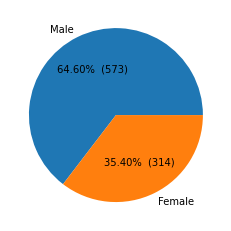

In [9]:
# Graph 1, pie chart of male and female passengers

males_females = data.Sex.value_counts()
def make_autopct(males_females):
    def my_autopct(pct):
        total = sum(males_females)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct
plt.pie(males_females, labels = ['Male', 'Female'], autopct=make_autopct(males_females))
plt.show()

233 females survived and 109 males survived


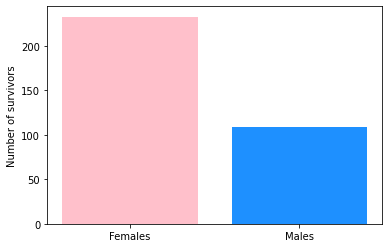

In [10]:
# Graph 2, bar chart of male and female survivors

survived_sex = data.loc[data['Survived'] == 1]['Sex']
xx_survived = sum(survived_sex.str.count('female'))
total_survived = len(survived_sex)
xy_survived = total_survived - xx_survived

print(xx_survived,'females survived and', xy_survived, 'males survived')

labels = ['Females', 'Males']
values = [xx_survived, xy_survived]
plt.bar(labels, values, color=['pink', 'dodgerblue'])
plt.ylabel('Number of survivors')
plt.show()

Text(0.5, 0, 'Passenger Age')

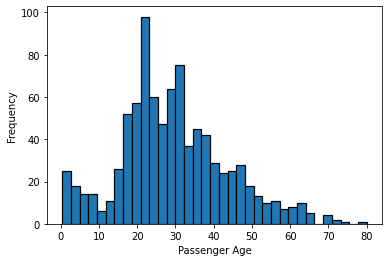

In [11]:
# Graph 3, bar chart to show the count of each age
# Age is continous and so the ages will be grouped to make visualization easier, if you want to graph each individual age
# as a bar chart, run the commented code below and you will see why it needs to be grouped as a histogram
# data['Age'].plot(kind="bar")

plt.hist(data['Age'],bins = 35, edgecolor='black', linewidth=1.2)
plt.ylabel('Frequency')
plt.xlabel('Passenger Age')

Text(0.5, 0, 'Proportion died and survived')

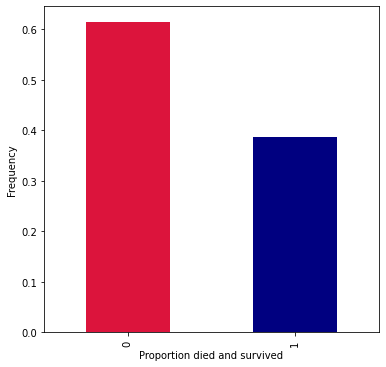

In [12]:
# Graph 4, a bar chart of the proportions of survival and death among all passengers

fig = plt.figure(figsize=(6,6))     
data.Survived.value_counts(normalize=True).plot(kind="bar",alpha=1, color = ['crimson', 'navy'])
plt.ylabel('Frequency')
plt.xlabel('Proportion died and survived')


Text(0.5, 0, 'Passenger class')

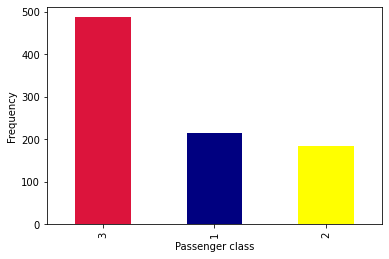

In [15]:
# Graph 5, a bar chart of the number of passengers per class

data['Passanger Class'].value_counts().plot(kind="bar", color = ['crimson', 'navy', 'yellow'])
plt.ylabel('Frequency')
plt.xlabel('Passenger class')


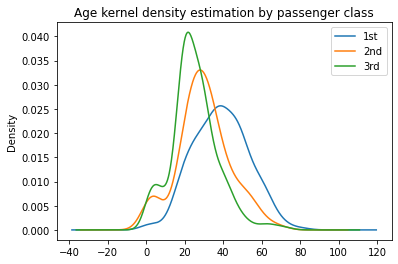

In [16]:
# Graph 6, a plot of the kernel density estimates of the three passenger classes

for x in [1,2,3]:    ## for 3 classes
    data.Age[data['Passanger Class'] == x].plot(kind="kde")
plt.title("Age kernel density estimation by passenger class")
plt.legend(("1st","2nd","3rd"))